<a href="https://colab.research.google.com/github/Nov05/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_Explanatory_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# modified by Nov05 on 2019-06-05
# DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling
# module3-make-explanatory-visualizations/

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt

from google.colab import files

%matplotlib inline

# import warnings
# warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')

### Colab fonts

https://stackoverflow.com/questions/51810908/custom-fonts-in-google-colaboratory-matplotlib-charts  
TTF folder is here.  
```
/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
```



In [2]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf

--2019-06-06 05:23:53--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2019-06-06 05:23:54--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  9

In [0]:
matplotlib.font_manager._rebuild()
matplotlib.rc('font', family='TH Sarabun New')

In [4]:
!wget https://github.com/JotJunior/PHP-Boleto-ZF2/blob/master/public/assets/fonts/arial.ttf -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf

--2019-06-06 05:24:00--  https://github.com/JotJunior/PHP-Boleto-ZF2/blob/master/public/assets/fonts/arial.ttf
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/arial.ttf’

arial.ttf               [ <=>                ]  64.14K  --.-KB/s    in 0.1s    

2019-06-06 05:24:01 (506 KB/s) - ‘/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/arial.ttf’ saved [65684]



In [0]:
# matplotlib.font_manager._rebuild()
# matplotlib.rc('font', family='Arial')

In [5]:
matplotlib.font_manager.findfont('Arial', rebuild_if_missing=False)

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


'/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

In [6]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

_Lambda School Data Science_

# Make Explanatory Visualizations

### Objectives

- identify misleading visualizations and how to fix them
- use Seaborn to visualize distributions and relationships with continuous and discrete variables
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

### Links

- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

# Avoid Misleading Visualizations

Did you find/discuss any interesting misleading visualizations in your Walkie Talkie?

## What makes a visualization misleading?

[5 Ways Writers Use Misleading Graphs To Manipulate You](https://venngage.com/blog/misleading-graphs/)

## Two y-axes

<img src="https://kieranhealy.org/files/misc/two-y-by-four-sm.jpg" width="800">
 
 Other Examples: 
 - [Spurious Correlations](https://tylervigen.com/spurious-correlations)
 - <https://blog.datawrapper.de/dualaxis/>
 - <https://kieranhealy.org/blog/archives/2016/01/16/two-y-axes/>
 - <http://www.storytellingwithdata.com/blog/2016/2/1/be-gone-dual-y-axis>

##  Y-axis doesn't start at zero.

<img src="https://i.pinimg.com/originals/22/53/a9/2253a944f54bb61f1983bc076ff33cdd.jpg" width="600">

## Pie Charts are bad

<img src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2009/11/Fox-News-pie-chart.png?fit=620%2C465&ssl=1" width="600">

## Pie charts that omit data are extra bad
 
- A guy makes a misleading chart that goes viral

 What does this chart imply at first glance? You don't want your user to have to do a lot of work in order to be able to interpret you graph correctly. You want that first-glance conclusions to be the correct ones.

 <img src="https://pbs.twimg.com/media/DiaiTLHWsAYAEEX?format=jpg&name=medium" width='600'>
 
 <https://twitter.com/michaelbatnick/status/1019680856837849090?lang=en>
 
- It gets picked up by overworked journalists (assuming incompetency before malice)
 
 <https://www.marketwatch.com/story/this-1-chart-puts-mega-techs-trillions-of-market-value-into-eye-popping-perspective-2018-07-18>
 
- Even after the chart's implications have been refuted, it's hard a bad (although compelling) visualization from being passed around.

 <https://www.linkedin.com/pulse/good-bad-pie-charts-karthik-shashidhar/>

**["yea I understand a pie chart was probably not the best choice to present this data."](https://twitter.com/michaelbatnick/status/1037036440494985216)**

## Pie Charts that compare unrelated things are next-level extra bad

<img src="http://www.painting-with-numbers.com/download/document/186/170403+Legalizing+Marijuana+Graph.jpg" width="600">


## Be careful about how you use volume to represent quantities:

radius vs diameter vs volume

<img src="https://static1.squarespace.com/static/5bfc8dbab40b9d7dd9054f41/t/5c32d86e0ebbe80a25873249/1546836082961/5474039-25383714-thumbnail.jpg?format=1500w" width="600">

## Don't cherrypick timelines or specific subsets of your data:

<img src="https://wattsupwiththat.com/wp-content/uploads/2019/02/Figure-1-1.png" width="600">

Look how specifically the writer has selected what years to show in the legend on the right side.

<https://wattsupwiththat.com/2019/02/24/strong-arctic-sea-ice-growth-this-year/>

Try the tool that was used to make the graphic for yourself

<http://nsidc.org/arcticseaicenews/charctic-interactive-sea-ice-graph/>
                                                                                           

## Use Relative units rather than Absolute Units

<img src="https://imgs.xkcd.com/comics/heatmap_2x.png" width="600">

## Avoid 3D graphs unless having the extra dimension is effective

Usually you can Split 3D graphs into multiple 2D graphs

3D graphs that are interactive can be very cool. (See Plotly and Bokeh)

<img src="https://thumbor.forbes.com/thumbor/1280x868/https%3A%2F%2Fblogs-images.forbes.com%2Fthumbnails%2Fblog_1855%2Fpt_1855_811_o.jpg%3Ft%3D1339592470" width="600">

## Don't go against typical conventions

<img src="http://www.callingbullshit.org/twittercards/tools_misleading_axes.png" width="600">

# Tips for choosing an appropriate visualization:

## Use Appropriate "Visual Vocabulary"

[Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)

## What are the properties of your data?
- Is your primary variable of interest continuous or discrete?
- Is in wide or long (tidy) format?
- Does your visualization involve multiple variables?
- How many dimensions do you need to include on your plot?

Can you express the main idea of your visualization in a single sentence?

How hard does your visualization make the user work in order to draw the intended conclusion?

## Which Visualization tool is most appropriate? 

[Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)

# Making Explanatory Visualizations with Seaborn

Today we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)



In [0]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [0]:
# Get all texts in the plot
p1_title = "'An Inconvenient Sequel: Truth to Power' is divisive"
p1_subtitle = "IMDb ratings for the film as of Aug. 29"
p1_xlabel = "Rating"
p1_ylabel = "Percent of total votes"

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

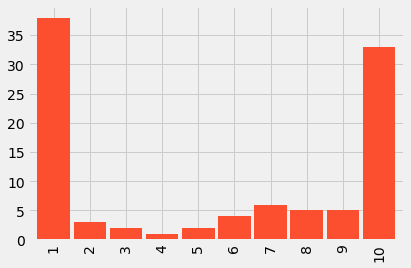

In [1]:
plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

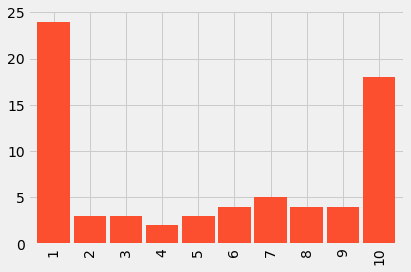

In [2]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

#### How pandas uses matplotlib plus figures axes and subplots

http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/how-pandas-uses-matplotlib-plus-figures-axes-and-subplots/

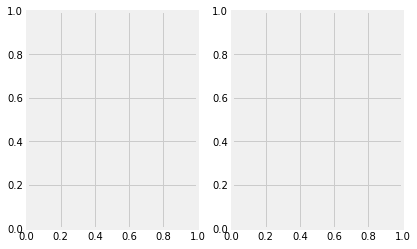

In [10]:
fig = plt.figure()
axes = fig.subplots(1, 2)
print(axes)

## Annotate with text

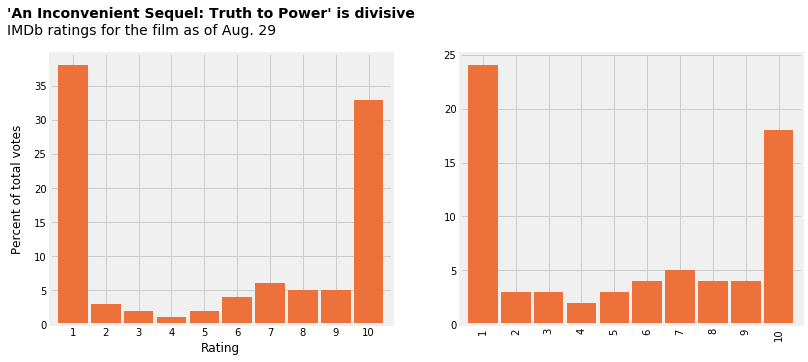

In [83]:
fig = plt.figure(figsize=(12, 5))

## draw only one plot in a figure
# ax = fake.plot.bar(color='#ED713A', width=0.9)
# plt.xticks(rotation=0)
# plt.xlabel(x=.47, y=-1, xlabel=p1_xlabel, 
#            fontsize=9, fontweight="bold", labelpad=15)
# plt.ylabel(x=1, y=.5, ylabel=p1_ylabel, 
#            fontsize=9, fontweight="bold", labelpad=15)

# draw two subplots
axes = fig.subplots(1, 2)
p1 = fake.plot.bar(color='#ED713A', width=0.9, ax=axes[0])
p2 = fake2.value_counts().sort_index().plot.bar(color='#ED713A', width=0.9, ax=axes[1])

axes[0].text(x=-2, y=45, s=p1_title, fontsize=14, fontweight='bold');
axes[0].text(x=-2, y=42.5, s=p1_subtitle, fontsize=14);
axes[0].tick_params(labelrotation=0)
# axes[0].set(xlabel=p1_xlabel, ylabel=p1_ylabel);
axes[0].set_xlabel(xlabel=p1_xlabel);
axes[0].set_ylabel(ylabel=p1_ylabel, labelpad=10);

In [90]:
# What p1 and p2 actually are
print(p1)
print(axes[0])
print(p2)
print(axes[1])

AxesSubplot(0.08,0.125;0.395455x0.755)
AxesSubplot(0.08,0.125;0.395455x0.755)
AxesSubplot(0.554545,0.125;0.395455x0.755)
AxesSubplot(0.554545,0.125;0.395455x0.755)


## Reproduce with real data

In [0]:
my_data = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [91]:
print(my_data.shape)
my_data.head()

(80053, 27)


,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [94]:
my_data['category'].value_counts()

Non-US users          4216
Males Aged 45+        4216
Top 1000 voters       4216
IMDb staff            4216
Females               4216
Males under 18        4216
Aged 18-29            4216
Aged 30-44            4216
Males Aged 30-44      4216
Females Aged 18-29    4216
Aged 45+              4216
Females Aged 30-44    4216
US users              4216
Aged under 18         4216
Males                 4216
Females Aged 45+      4216
IMDb users            4216
Males Aged 18-29      4216
Females under 18      4165
Name: category, dtype: int64

In [102]:
(my_data[my_data['category']=='Non-US users']
 .drop(['timestamp', 'respondents'], axis=1)
 .drop_duplicates()
 .shape)

(241, 25)

In [187]:
# the 'respondents' column is accumulative, 
# so I could just use the last entry for each category 
(my_data[my_data['category']=='Non-US users'][['timestamp', 'respondents']]
 .sort_values(by='timestamp', ascending=False)
 .head())

,timestamp,respondents
80051,2017-08-29 23:10:06.022268,565
80032,2017-08-29 23:00:05.634805,565
80013,2017-08-29 22:50:06.393880,565
79994,2017-08-29 22:40:05.985688,565
79975,2017-08-29 22:30:06.150572,565


In [214]:
df = (my_data[my_data['category']=='Non-US users']
      .sort_values(by='timestamp', ascending=False)
      .head(1).
      T
     )
df = df.iloc[-10:,]
df

,80051
1_pct,22.8
2_pct,1.9
3_pct,1.8
4_pct,1.4
5_pct,5.7
6_pct,8.3
7_pct,9.2
8_pct,6.5
9_pct,6.2
10_pct,36.1


In [247]:
xticklabels = df.index.tolist()
xticklabels = [x.strip('_pct') for x in xticklabels]
xticklabels

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

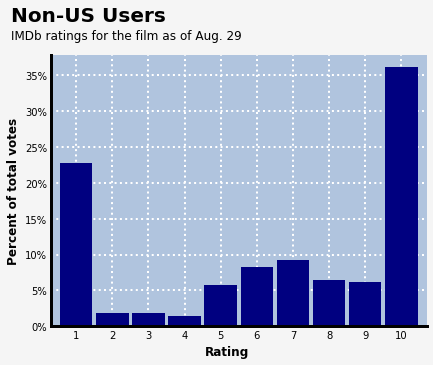

In [380]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = 'whitesmoke'

fig = plt.figure(figsize=(6, 5))
## facecolor : default: rcParams["figure.facecolor"]
## doesn't work in this case
# fig.patch.set_facecolor('blacks')
ax = fig.subplots(1, 1)

# draw only one plot in a figure
df.plot.bar(color='navy', width=0.9, legend=False, ax=ax)
ax.set_facecolor('lightsteelblue')
ax.grid(linestyle=':', linewidth='2', color='white')
# ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f%%'))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# ax.spines["bottom"].set_visible(False)
# ax.spines["left"].set_visible(False)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

plt.title(label="Non-US Users",
          x=0.1, y= 1.1, 
          fontsize=20, fontweight='bold')
plt.text(s=p1_subtitle,
         x=-1.8, y=40, 
         fontsize=12)
plt.xticks(ticks=np.arange(10),
           labels=xticklabels,
           rotation=0)
plt.xlabel(x=.47, y=1, xlabel=p1_xlabel, 
           fontsize=12, fontweight="bold", labelpad=5)
plt.ylabel(x=-.5, y=.5, ylabel=p1_ylabel, 
           fontsize=12, fontweight="bold", labelpad=5);

In [381]:
# 【issue solved】picture saved is blank
# because pandas.df.plot.bar(ax=ax) is not hooked
pic_name = 'p1.png'
fig.savefig(pic_name, bbox_inches='tight', transparent=False)
files.download(pic_name)

/usr/lib/python3.6/threading.py:864: ResourceWarning: unclosed <socket.socket fd=92, family=AddressFamily.AF_INET6, type=SocketKind.SOCK_STREAM, proto=0, laddr=('::', 17127, 0, 0)>
  self._target(*self._args, **self._kwargs)


# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!









### Both Republicans And Democrats Have an Age Problem

https://fivethirtyeight.com/features/both-republicans-and-democrats-have-an-age-problem/

<img src="https://fivethirtyeight.com/wp-content/uploads/2014/04/silver-age-congress-1.png?w=1150" width='500'>

In [0]:
csv_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/congress-age/congress-terms.csv"
my_data = pd.read_csv(csv_url)

In [8]:
print(my_data.shape)
my_data.head()

(18635, 13)


,congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
0,80,house,M000112,Joseph,Jefferson,Mansfield,NaN,1861-02-09,TX,D,Yes,1947-01-03,85.9
1,80,house,D000448,Robert,Lee,Doughton,NaN,1863-11-07,NC,D,Yes,1947-01-03,83.2
2,80,house,S000001,Adolph,Joachim,Sabath,NaN,1866-04-04,IL,D,Yes,1947-01-03,80.7
3,80,house,E000023,Charles,Aubrey,Eaton,NaN,1868-03-29,NJ,R,Yes,1947-01-03,78.8
4,80,house,L000296,William,NaN,Lewis,NaN,1868-09-22,KY,R,No,1947-01-03,78.3


In [9]:
my_data['birthday'] = pd.to_datetime(my_data['birthday'], format='%Y-%m-%d')
my_data['termstart'] = pd.to_datetime(my_data['termstart'], format='%Y-%m-%d')
my_data['birthday'].sample(5)                                     

5858    1923-04-27
1761    1892-09-15
9690    1939-09-18
2675    1883-01-21
13704   1943-08-27
Name: birthday, dtype: datetime64[ns]

In [10]:
term_start = pd.to_datetime('1947-01-01', format='%Y-%m-%d')
term_end = pd.to_datetime('2013-12-31', format='%Y-%m-%d')
print(term_start)

1947-01-01 00:00:00


In [11]:
conditions = (
     (my_data['termstart']>=term_start)
     & (my_data['termstart']<=term_end)
     & (my_data['party'].isin(['R','D']))
)
df = my_data[conditions][['termstart', 'age', 'party']]
print(df.shape)
df.head(2)

(18564, 3)


,termstart,age,party
0,1947-01-03,85.9,D
1,1947-01-03,83.2,D


In [12]:
df = (df
      .groupby(by=['party','termstart'])
      .mean()
      .sort_values(by=['party','termstart'])
      .reset_index()
     )
print(df.shape)
df.head()

(68, 3)


,party,termstart,age
0,D,1947-01-03,52.006883
1,D,1949-01-03,51.430303
2,D,1951-01-03,52.295890
3,D,1953-01-03,52.258029
4,D,1955-01-05,52.254861


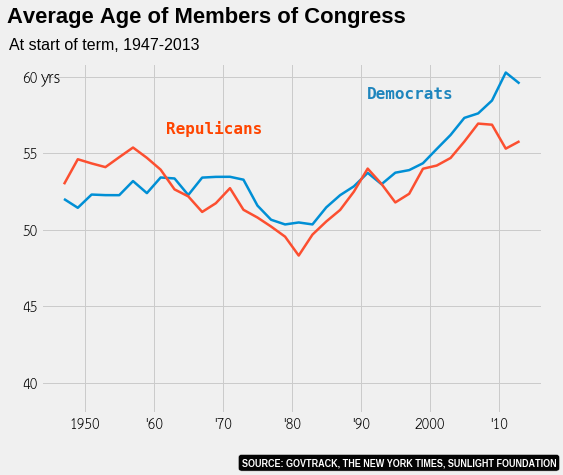

In [193]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(8, 6))
## facecolor : default: rcParams["figure.facecolor"]
# fig.patch.set_facecolor('blacks') # this line doesn't work in this case
ax = fig.subplots(1, 1)

for p in ['D','R']:
  ax.plot_date(x=df[df['party']==p]['termstart'], 
               y=df[df['party']==p]['age'],
               linestyle='-', 
               linewidth=2.5,
               marker=None);

plt.title(label="Average Age of Members of Congress",
          x=0.33, y=1.1, 
#           fontname='Arial', # 【Issue】Don't know how to install Arial
          fontname='Liberation Sans',
          fontsize=22, fontweight='bold')
plt.text(x=-0.065, y=1.04, transform=ax.transAxes,
         s="At start of term, 1947-2013",
         fontname='Liberation Sans',
         fontsize=16)
plt.text(x=0, y=0.95, transform=ax.transAxes,
         s="yrs",
         fontname='TH Sarabun New', # this font installed in Colab successfully
         fontsize=16)
plt.text(x=0.25, y=0.8, transform=ax.transAxes,
         s="Repulicans",
         fontname='DejaVu Sans Mono', 
         fontsize=16,
         color="orangered",
         fontweight='bold')
plt.text(x=0.65, y=0.90, transform=ax.transAxes,
         s="Democrats",
         fontname='DejaVu Sans Mono',
         fontsize=16,
         color='#1E85BD',
         fontweight='bold')
plt.text(x=0.4, y=-0.15, transform=ax.transAxes,
         s="SOURCE: GOVTRACK, THE NEW YORK TIMES, SUNLIGHT FOUNDATION",
         fontname='Liberation Sans Narrow',
         fontsize=11,
         color='white',
         fontweight='bold',
         bbox=dict(boxstyle='round', 
                   facecolor='black', 
                   alpha=0.99))

# ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(base=10))
# ax.xaxis.set_minor_locator(matplotlib.dates.YearLocator(base=1))
# ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
# ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('\'%y'))

# xticklocs = ax.get_xticks()
xticklabels = ['', '1950', '\'60', '\'70', '\'80', 
               '\'90', '2000', '\'10']
ax.set_xticklabels(labels=xticklabels)

ax.set_ylim(bottom=38);

Go to the story: https://fivethirtyeight.com/features/both-republicans-and-democrats-have-an-age-problem/  
Tick formatters: https://matplotlib.org/3.1.0/gallery/ticks_and_spines/tick-formatters.html  

In [177]:
ax.xaxis.get_majorticklabels()[1]

Text(711858.0, 0, '1950')

In [184]:
ax.get_xticks()

array([708205., 711858., 715510., 719163., 722815., 726468., 730120.,
       733773., 737425.])

In [150]:
my_data.isna().sum()

congress              0
chamber               0
bioguide              0
firstname             0
middlename         3536
lastname              0
suffix            16937
birthday              0
state                 0
party                 0
incumbent             0
termstart             0
age                   0
birth_year            0
termstart_year        0
dtype: int64

In [138]:
my_data.loc[0, 'birthday'].year

1861

In [139]:
my_data['birthday'].dt.year.head()

0    1861
1    1863
2    1866
3    1868
4    1868
Name: birthday, dtype: int64

In [391]:
my_data['party'].value_counts()

D     10290
R      8274
I        63
ID        4
AL        3
L         1
Name: party, dtype: int64

In [0]:
my_data['birth_year'] = my_data['birthday'].dt.year
my_data['termstart_year'] = my_data['termstart'].dt.year

In [162]:
my_data['termstart_year'].describe()

count    18635.000000
mean      1979.891977
std         19.646858
min       1947.000000
25%       1963.000000
50%       1979.000000
75%       1997.000000
max       2013.000000
Name: termstart_year, dtype: float64

In [400]:
conditions = ((my_data['termstart_year']>=1800) 
              & (my_data['party'].isin(['I', 'ID', 'AL', 'L'])))
(alt.Chart(my_data[conditions])
    .mark_point()
    .encode(alt.X('termstart',
                  scale=alt.Scale(zero=False)
                 ),
            y='birthday',
            color='party'
           )
    .configure_mark(opacity=0.5)
   )

Chart({
  config: Config({
    mark: MarkConfig({
      opacity: 0.5
    })
  }),
  data:        congress chamber bioguide  ...   age birth_year termstart_year
  334          80   house  M000122  ...  44.1       1902           1947
  419          80   house  I000046  ...  36.7       1910           1947
  854          81   house  M000122  ...  46.1       1902           1949
  984          81   house  R000425  ...  34.4       1914           1949
  1109         81  senate  H000953  ...  37.6       1911           1949
  1300         82   house  R000100  ...  54.0       1897           1951
  1662         82  senate  H000953  ...  39.6       1911           1951
  1825         83   house  R000100  ...  56.0       1897           1953
  2187         83  senate  M001014  ...  52.2       1900           1953
  2218         83  senate  H000953  ...  41.6       1911           1953
  2695         84  senate  H000963  ...  61.4       1893           1955
  2728         84  senate  M001014  ...  54.2       1900           1955
  2760         84  senate  H000953  ...  43.6       1911           1955
  3304         85  senate  H000953  ...  45.6       1911           1957
  3663         86   house  A000105  ...  42.9       1916           1959
  3849         86  senate  H000953  ...  47.6       1911           1959
  3862         86  senate  M000311  ...  42.8       1916           1959
  4401         87  senate  H000953  ...  49.6       1911           1961
  4416         87  senate  M000311  ...  44.8       1916           1961
  4944         88  senate  H000953  ...  51.6       1911           1963
  4959         88  senate  M000311  ...  46.8       1916           1963
  4976         88  senate  M000851  ...  35.0       1928           1963
  5504         89  senate  M000311  ...  48.8       1916           1965
  5523         89  senate  M000851  ...  37.0       1928           1965
  6040         90  senate  M000311  ...  50.8       1916           1967
  6065         90  senate  M000851  ...  39.0       1928           1967
  6584         91  senate  M000311  ...  52.8       1916           1969
  6614         91  senate  M000851  ...  41.0       1928           1969
  7107         92  senate  H000953  ...  59.7       1911           1971
  7119         92  senate  B001209  ...  56.1       1914           1971
  ...         ...     ...      ...  ...   ...        ...            ...
  8266         94  senate  A000202  ...  41.9       1933           1975
  8732         95  senate  H000953  ...  65.6       1911           1977
  8734         95  senate  H000956  ...  64.9       1912           1977
  8742         95  senate  B001209  ...  62.0       1914           1977
  8808         95  senate  A000202  ...  43.9       1933           1977
  9284         96  senate  B001209  ...  64.1       1914           1979
  9538         97   house  F000235  ...  52.1       1928           1981
  9824         97  senate  B001209  ...  66.0       1914           1981
  12350       102   house  S000033  ...  49.3       1941           1991
  12846       103   house  S000033  ...  51.3       1941           1993
  13358       104   house  S000033  ...  53.3       1941           1995
  13886       105   house  S000033  ...  55.3       1941           1997
  14413       106   house  S000033  ...  57.3       1941           1999
  14939       107   house  S000033  ...  59.3       1941           2001
  14982       107   house  C001045  ...  56.3       1944           2001
  15024       107   house  G000280  ...  54.2       1946           2001
  15279       107  senate  J000072  ...  66.7       1934           2001
  15334       107  senate  B001237  ...  50.3       1950           2001
  15463       108   house  S000033  ...  61.3       1941           2003
  15819       108  senate  J000072  ...  68.7       1934           2003
  15990       109   house  S000033  ...  63.3       1941           2005
  16356       109  senate  J000072  ...  70.7       1934           2005
  16920       110  senat

In [424]:
conditions = ((my_data['termstart_year']>=1990) 
              & (my_data['party']=='D'))
(alt.Chart(my_data[conditions])
    .mark_point()
    .encode(alt.X('termstart',
                  scale=alt.Scale(zero=False)
                 ),
            y='age',
            color='party'
           )
    .configure_mark(opacity=0.5)
)

Chart({
  config: Config({
    mark: MarkConfig({
      opacity: 0.5
    })
  }),
  data:        congress chamber bioguide  ...   age birth_year termstart_year
  12091       102   house  Y000013  ...  81.4       1909           1991
  12092       102   house  N000009  ...  81.3       1909           1991
  12093       102   house  W000428  ...  80.7       1910           1991
  12094       102   house  B000371  ...  80.1       1910           1991
  12095       102   house  A000189  ...  77.9       1913           1991
  12096       102   house  J000256  ...  77.4       1913           1991
  12097       102   house  L000226  ...  77.2       1913           1991
  12098       102   house  P000328  ...  77.2       1913           1991
  12099       102   house  E000064  ...  76.0       1915           1991
  12100       102   house  A000212  ...  76.0       1915           1991
  12102       102   house  R000485  ...  74.9       1916           1991
  12103       102   house  G000272  ...  74.7       1916           1991
  12104       102   house  F000041  ...  73.8       1917           1991
  12106       102   house  H000388  ...  72.9       1918           1991
  12108       102   house  G000153  ...  71.0       1920           1991
  12109       102   house  S000124  ...  70.9       1920           1991
  12110       102   house  O000069  ...  70.8       1920           1991
  12111       102   house  B000918  ...  70.8       1920           1991
  12112       102   house  S000596  ...  70.8       1920           1991
  12113       102   house  M000865  ...  70.4       1920           1991
  12115       102   house  D000586  ...  69.9       1921           1991
  12116       102   house  B000431  ...  69.8       1921           1991
  12119       102   house  B000153  ...  68.8       1922           1991
  12123       102   house  U000001  ...  68.6       1922           1991
  12125       102   house  B000880  ...  68.0       1922           1991
  12127       102   house  H000067  ...  67.7       1923           1991
  12129       102   house  R000383  ...  66.8       1924           1991
  12131       102   house  G000511  ...  66.4       1924           1991
  12134       102   house  S000948  ...  65.9       1925           1991
  12137       102   house  S000081  ...  65.2       1925           1991
  ...         ...     ...      ...  ...   ...        ...            ...
  18584       113  senate  B000944  ...  60.2       1952           2013
  18586       113  senate  H001049  ...  59.6       1953           2013
  18587       113  senate  M001170  ...  59.4       1953           2013
  18588       113  senate  M000639  ...  59.0       1954           2013
  18590       113  senate  W000805  ...  58.1       1954           2013
  18593       113  senate  D000607  ...  57.3       1955           2013
  18594       113  senate  W000802  ...  57.2       1955           2013
  18595       113  senate  H001069  ...  57.2       1955           2013
  18596       113  senate  L000550  ...  57.1       1955           2013
  18599       113  senate  T000464  ...  56.4       1956           2013
  18600       113  senate  M001176  ...  56.2       1956           2013
  18603       113  senate  K000384  ...  54.9       1958           2013
  18604       113  senate  C000127  ...  54.2       1958           2013
  18606       113  senate  C001070  ...  52.7       1960           2013
  18608       113  senate  K000367  ...  52.6       1960           2013
  18609       113  senate  W000818  ...  52.2       1960           2013
  18613       113  senate  B001230  ...  50.9       1962           2013
  18614       113  senate  B001265  ...  50.8       1962           2013
  18617       113  senate  P000590  ...  50.0       1963           2013
  18618       113  senate  C001088  ...  49.3       1963           2013
  18619       113  senate  B001267  ...  48.1       1964           2013
  18621       113  senate  G000555  ...  46.1       1966           2013
  18623       113  senat